In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

In [2]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [3]:
data_copy = data.copy()
X1 = data_copy['x1']
X2 = data_copy['x2']
X3 = data_copy['x3']
X4 = data_copy['x4']
X5 = data_copy['x5']

y = data_copy['y']
len(y)
X1 = torch.tensor(X1).float()
X2 = torch.tensor(X2).float()
X3 = torch.tensor(X3).float()
X4 = torch.tensor(X4).float()
X5 = torch.tensor(X5).float()
y = torch.tensor(y).float()

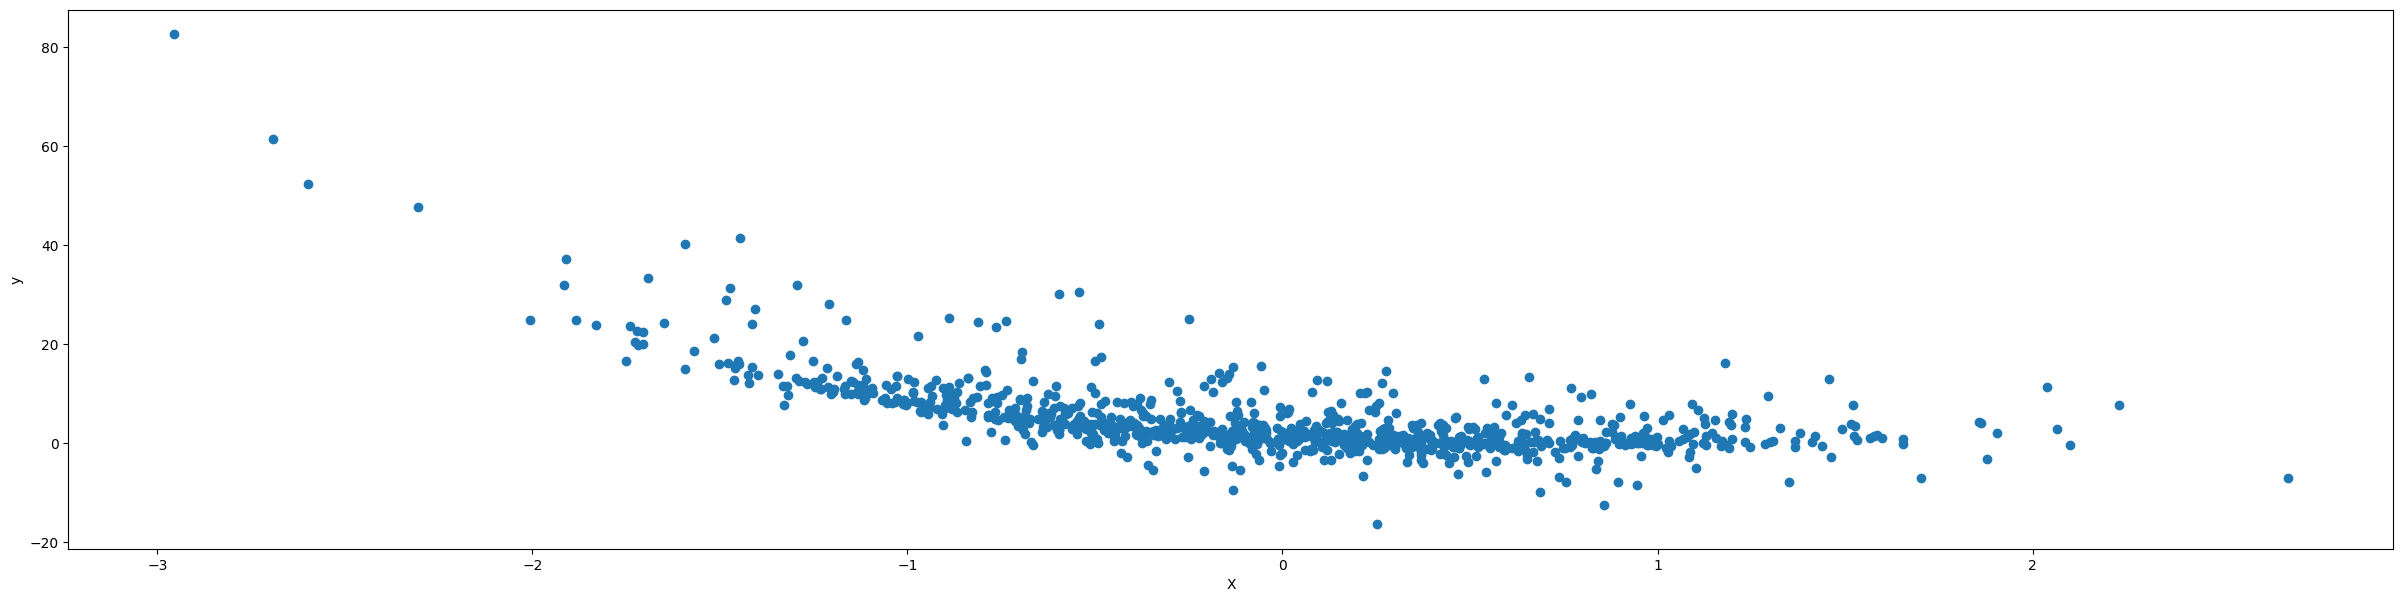

In [4]:
plt.figure(figsize = (30,7))
plt.scatter(X1, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

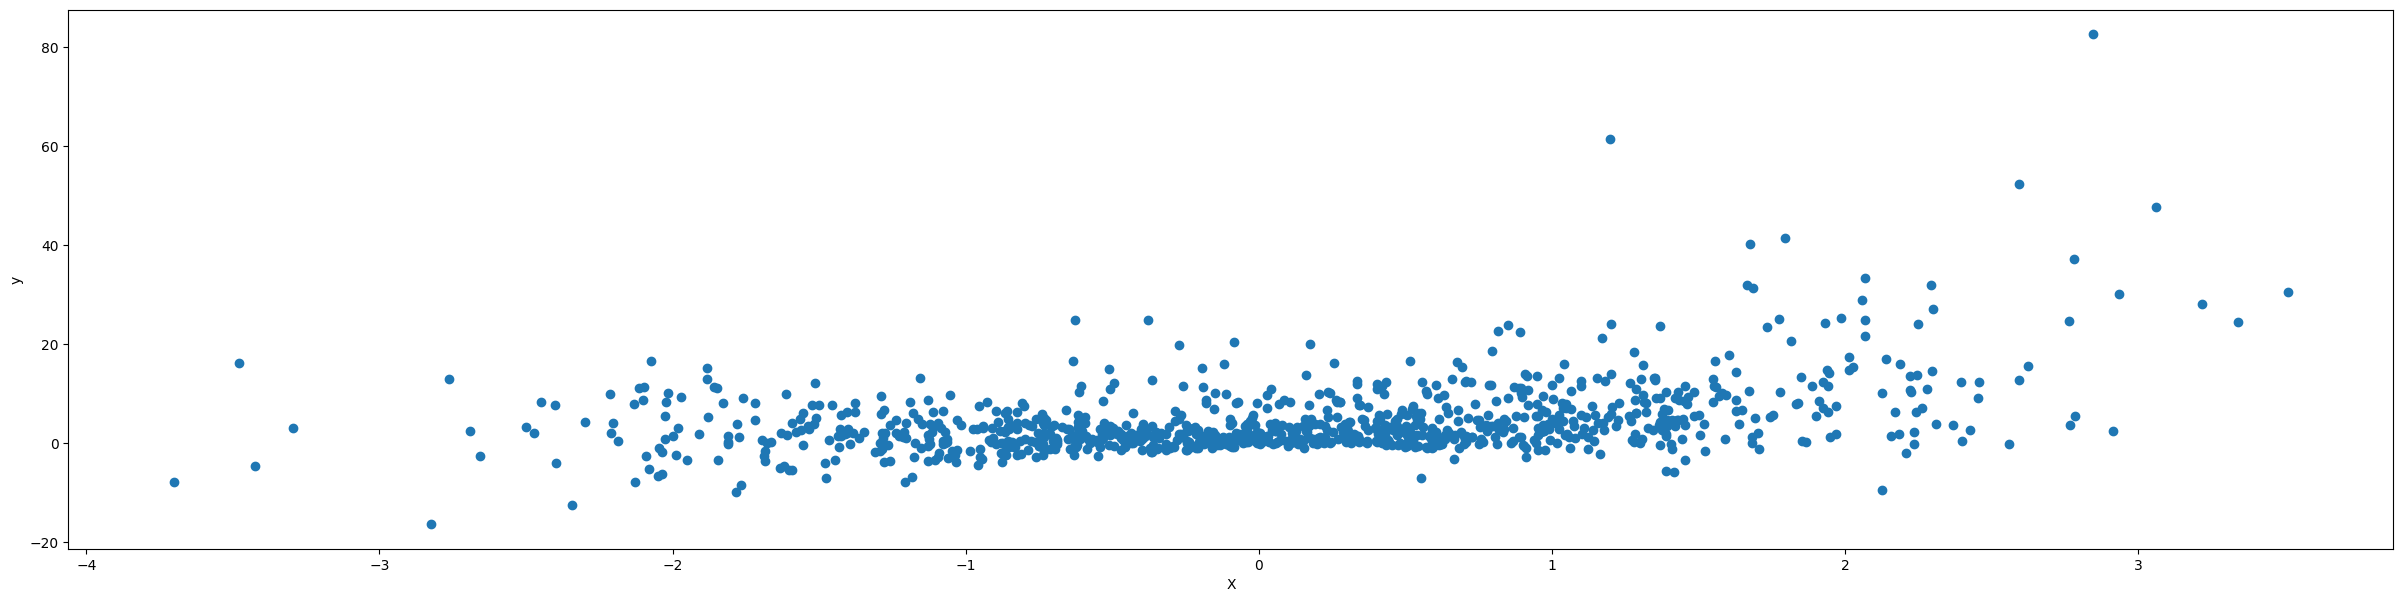

In [5]:
plt.figure(figsize = (30,7))
plt.scatter(X2, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

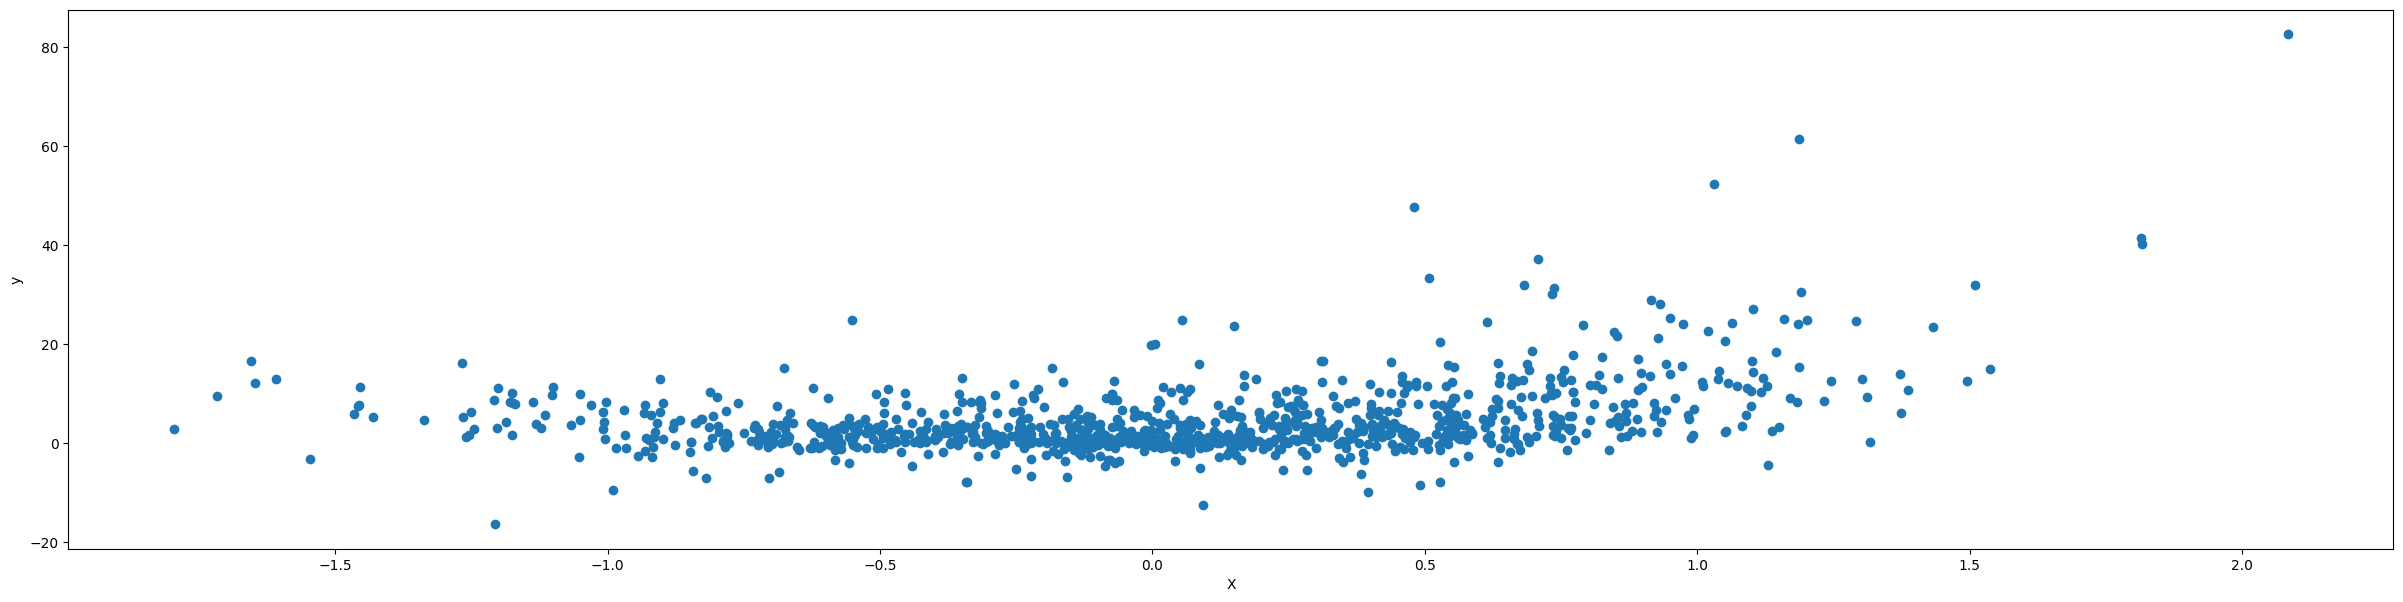

In [6]:
plt.figure(figsize = (30,7))
plt.scatter(X3, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

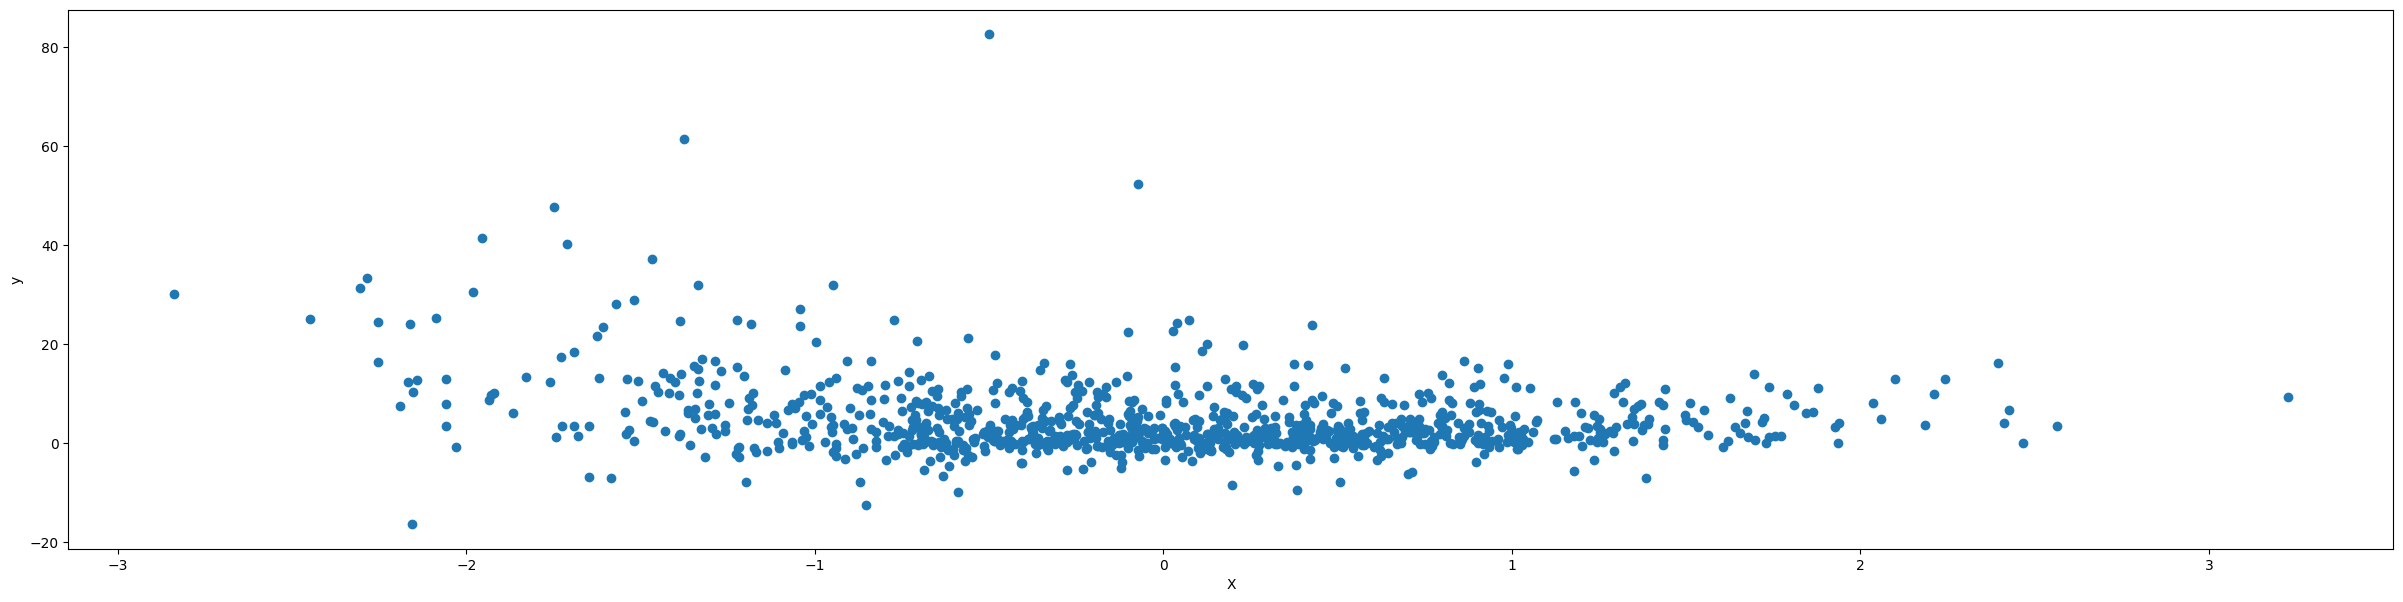

In [7]:
plt.figure(figsize = (30,7))
plt.scatter(X4, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

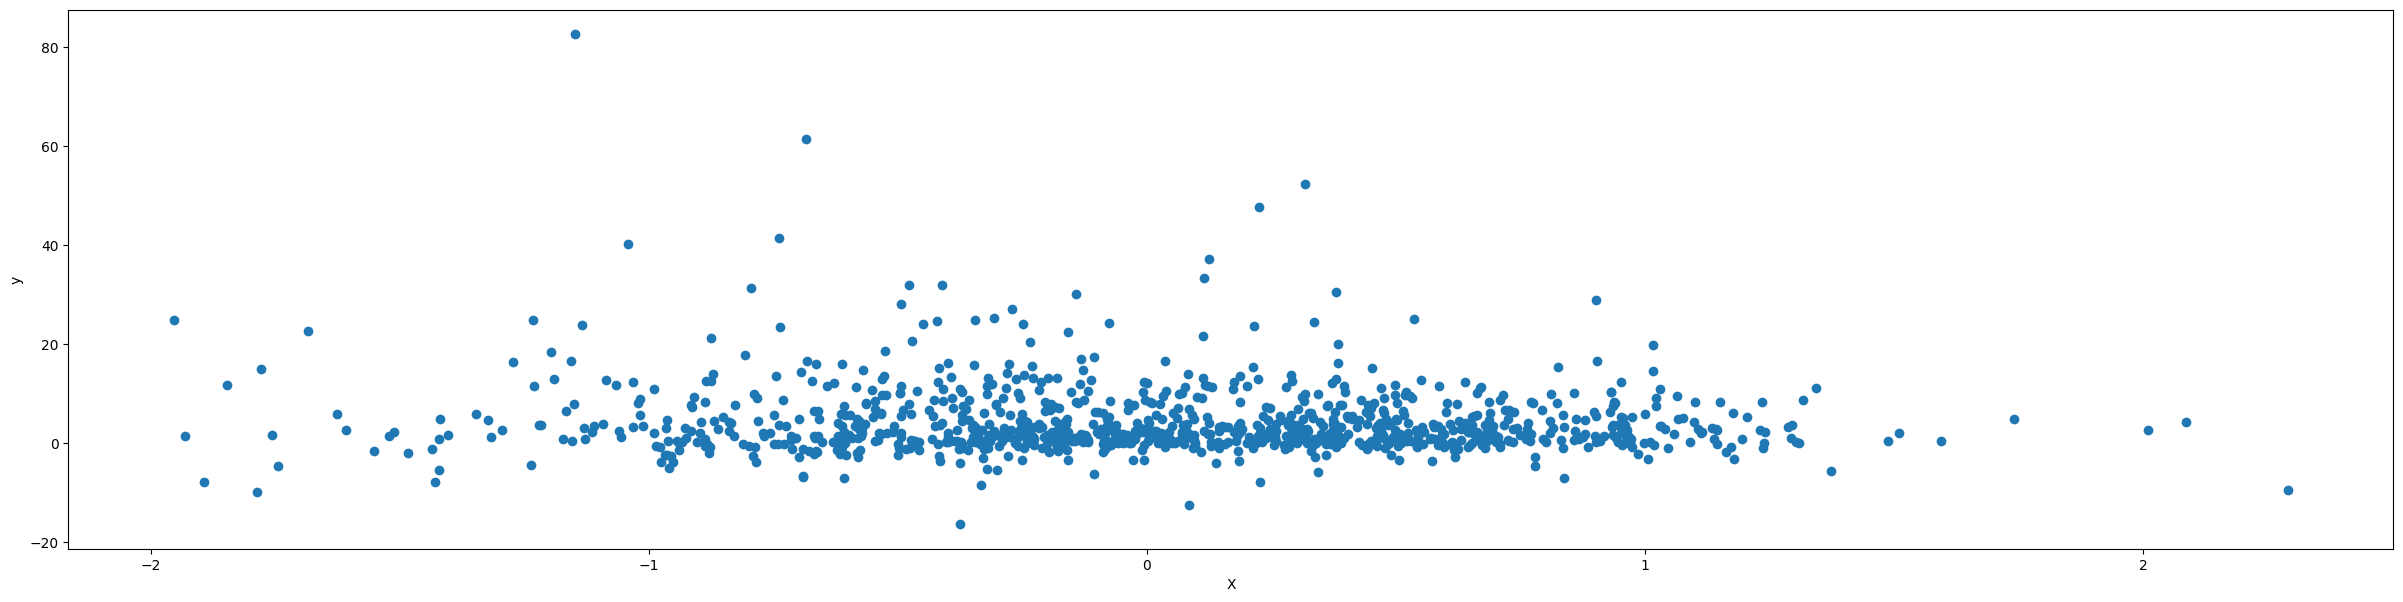

In [8]:
plt.figure(figsize = (30,7))
plt.scatter(X5, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

In [10]:
splitter = int(0.8 * len(X1))
X_train1, X_test1 = X1[:splitter], X1[splitter:]
X_train2, X_test2 = X2[:splitter], X2[splitter:]
X_train3, X_test3 = X3[:splitter], X3[splitter:]
X_train4, X_test4 = X4[:splitter], X4[splitter:]
X_train5, X_test5 = X5[:splitter], X5[splitter:]

y_train, y_test = y[:splitter], y[splitter:]

print(f"Input Train: {X_train1.shape}")
print(f"Input Test: {X_test1.shape}")
print(f"Input Train: {X_train2.shape}")
print(f"Input Test: {X_test2.shape}")
print(f"Input Train: {X_train3.shape}")
print(f"Input Test: {X_test3.shape}")
print(f"Input Train: {X_train4.shape}")
print(f"Input Test: {X_test4.shape}")
print(f"Input Train: {X_train5.shape}")
print(f"Input Test: {X_test5.shape}")
print(f"Output Train: {y_train.shape}")
print(f"Output Test: {y_test.shape}")

y_test.dtype

Input Train: torch.Size([800])
Input Test: torch.Size([200])
Input Train: torch.Size([800])
Input Test: torch.Size([200])
Input Train: torch.Size([800])
Input Test: torch.Size([200])
Input Train: torch.Size([800])
Input Test: torch.Size([200])
Input Train: torch.Size([800])
Input Test: torch.Size([200])
Output Train: torch.Size([800])
Output Test: torch.Size([200])


torch.float32

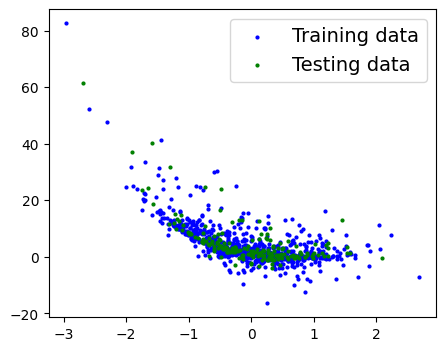

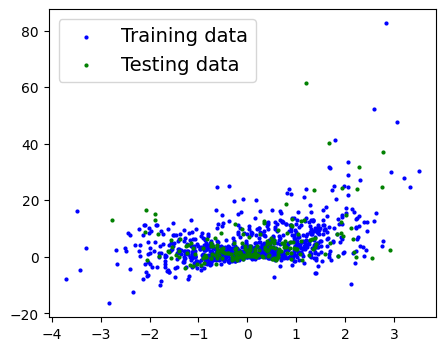

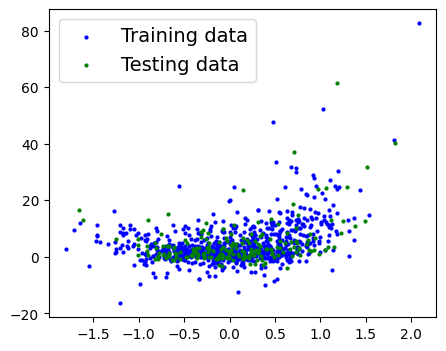

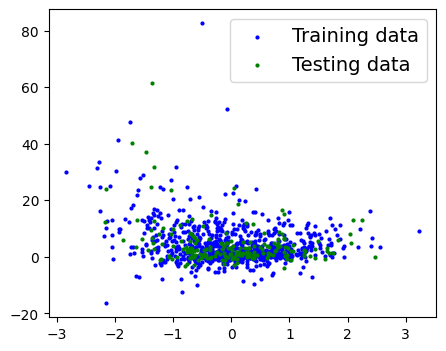

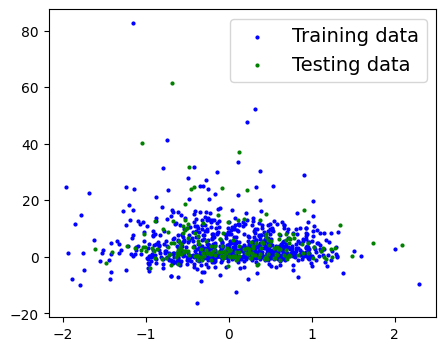

In [11]:
plot_predictions(train_data=X_train1, train_labels=y_train, test_data=X_test1, test_labels=y_test)
plot_predictions(train_data=X_train2, train_labels=y_train, test_data=X_test2, test_labels=y_test)
plot_predictions(train_data=X_train3, train_labels=y_train, test_data=X_test3, test_labels=y_test)
plot_predictions(train_data=X_train4, train_labels=y_train, test_data=X_test4, test_labels=y_test)
plot_predictions(train_data=X_train5, train_labels=y_train, test_data=X_test5, test_labels=y_test)



In [12]:
class PolynomialRegressionModel(nn.Module):
    def __init__(self, degree, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.W1 = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.W2 = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.W3 = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        
    def forward(self, x: torch.Tensor, degree = 2):
        if degree == 2:
            y = self.W1 * x ** 2 + self.W2 * x + self.bias #  as the formula (y = W1 *x **2 + W2 * x + bias)
        elif degree == 3:
            y = self.W1 * x ** 3 + self.W2 * x ** 2 + self.W3  * x + self.bias #  as the formula (y = W1 *x **2 + W2 * x + bias)
            
        return y

In [13]:
def divider():
    print("-----------------------------------")
    
X1_model = PolynomialRegressionModel(degree = 3)
list(X1_model.parameters())
divider()
print(X1_model.state_dict())


-----------------------------------
OrderedDict([('W1', tensor([-1.1828])), ('W2', tensor([0.1718])), ('W3', tensor([1.4925])), ('bias', tensor([-0.0012]))])


In [14]:
def divider():
    print("-----------------------------------")
    
X2_model = PolynomialRegressionModel(degree = 2)
list(X2_model.parameters())
divider()
print(X2_model.state_dict())

-----------------------------------
OrderedDict([('W1', tensor([-0.5379])), ('W2', tensor([-1.0429])), ('W3', tensor([-0.0881])), ('bias', tensor([-0.1331]))])


In [15]:
def divider():
    print("-----------------------------------")
    
X3_model = PolynomialRegressionModel(degree = 2)
list(X3_model.parameters())
divider()
print(X3_model.state_dict())

-----------------------------------
OrderedDict([('W1', tensor([0.5955])), ('W2', tensor([0.2737])), ('W3', tensor([0.8070])), ('bias', tensor([0.9178]))])


In [16]:
def divider():
    print("-----------------------------------")
    
X4_model = PolynomialRegressionModel(degree = 3)
list(X4_model.parameters())
divider()
print(X4_model.state_dict())

-----------------------------------
OrderedDict([('W1', tensor([1.3239])), ('W2', tensor([-0.7531])), ('W3', tensor([1.0231])), ('bias', tensor([0.0271]))])


In [17]:
def divider():
    print("-----------------------------------")
    
X5_model = PolynomialRegressionModel(degree = 3)
list(X5_model.parameters())
divider()
print(X5_model.state_dict())

-----------------------------------
OrderedDict([('W1', tensor([0.0308])), ('W2', tensor([0.5301])), ('W3', tensor([-1.9044])), ('bias', tensor([0.2220]))])


In [18]:
with torch.inference_mode():
    y_preds1 = X1_model(X_test1)

print(f"Values: {y_preds1}")

with torch.inference_mode():
    y_preds2 = X2_model(X_test2)

divider()
print(f"Values: {y_preds2}")

with torch.inference_mode():
    y_preds3 = X3_model(X_test3)

divider()
print(f"Values: {y_preds3}")

with torch.inference_mode():
    y_preds4 = X4_model(X_test4)

divider()
print(f"Values: {y_preds4}")

with torch.inference_mode():
    y_preds5 = X5_model(X_test5)

divider()
print(f"Values: {y_preds5}")

Values: tensor([-2.8155e-01, -3.5045e+00, -4.3878e-01, -3.5632e-03, -7.3472e-04,
        -1.1913e-01, -1.4882e-01, -1.5905e+00, -2.9637e-03, -9.3840e-02,
        -2.2660e+00,  2.2564e-03, -2.4203e-01, -5.8736e-01, -1.7674e+00,
        -4.4991e-01, -2.4221e-02, -2.1841e-01, -1.0033e+00, -1.1156e+00,
        -1.8350e-01,  7.4181e-04, -3.5851e-02, -2.3132e-01, -2.8210e-01,
        -1.5156e-01, -7.5328e-01, -1.0981e-01,  1.2056e-03, -1.3137e+00,
        -1.0914e-02, -6.8318e-03, -6.3922e-02, -1.0069e+00, -5.7680e-01,
         1.9474e-03, -7.3232e-01, -1.5876e+00, -1.3162e+00, -1.5344e-02,
        -1.6063e+00, -1.8386e-01, -9.0400e-02, -8.2780e-01, -5.6313e-02,
        -3.4492e-02, -4.3690e-01, -8.2855e-01, -8.3140e-02, -3.5137e-01,
        -1.2013e-01, -9.3929e-01, -5.8257e-01, -3.2912e-01, -8.6773e-01,
        -1.6699e+00, -7.7110e-01, -3.2764e+00, -4.2272e-01, -1.2659e+00,
        -1.5794e-03, -6.5037e-01, -2.4983e-01, -4.2003e-04, -4.4016e-01,
        -1.5865e-01, -5.1744e-01, -7.4786e-

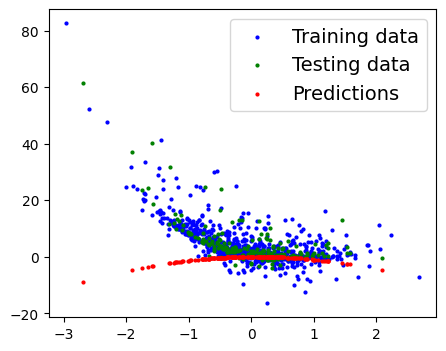

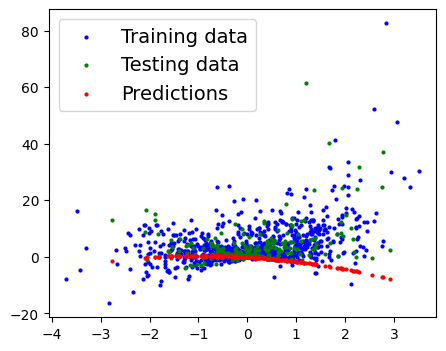

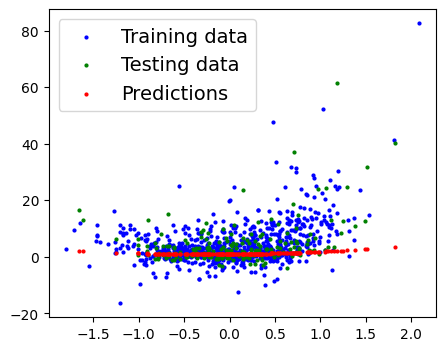

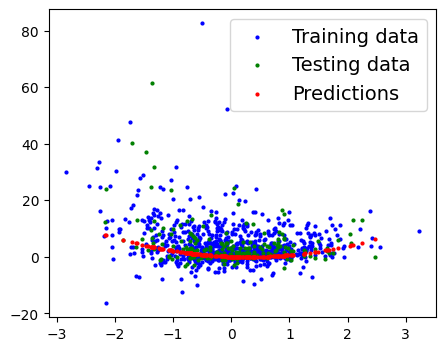

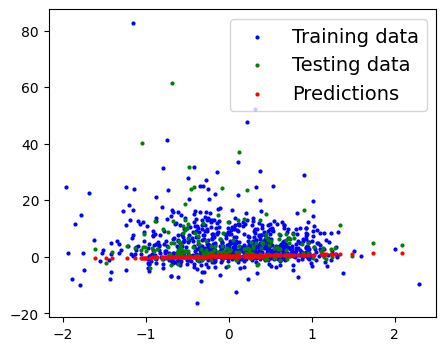

In [19]:
plot_predictions(X_train1, y_train, X_test1, y_test, y_preds1)
plot_predictions(X_train2, y_train, X_test2, y_test, y_preds2)
plot_predictions(X_train3, y_train, X_test3, y_test, y_preds3)
plot_predictions(X_train4, y_train, X_test4, y_test, y_preds4)
plot_predictions(X_train5, y_train, X_test5, y_test, y_preds5)

In [20]:
def trainning(model: nn.Module,
      train_data: torch.Tensor,
      train_labels: torch.Tensor,
      test_data: torch.Tensor,
      test_labels: torch.Tensor,
      loss_function: nn.Module,
      optimizer: torch.optim.Optimizer,
      epochs: int):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.no_grad():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MSE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr
        

In [21]:
loss_function = nn.MSELoss()
optimizer1 = torch.optim.SGD(X1_model.parameters(), lr=0.0007)

In [22]:
epochs_count1, train_loss1, test_loss1 =trainning(X1_model, 
                                               train_data=X_train1, 
                                               train_labels=y_train, 
                                               test_data=X_test1, 
                                               test_labels=y_test, 
                                               loss_function=loss_function, 
                                               optimizer=optimizer1, 
                                               epochs=1000)

Epoch 0: MSE Loss: 87.59 | Test Loss: 93.92
Epoch 10: MSE Loss: 85.06 | Test Loss: 91.32
Epoch 20: MSE Loss: 82.64 | Test Loss: 88.82
Epoch 30: MSE Loss: 80.31 | Test Loss: 86.43
Epoch 40: MSE Loss: 78.08 | Test Loss: 84.12
Epoch 50: MSE Loss: 75.95 | Test Loss: 81.91
Epoch 60: MSE Loss: 73.90 | Test Loss: 79.78
Epoch 70: MSE Loss: 71.94 | Test Loss: 77.73
Epoch 80: MSE Loss: 70.05 | Test Loss: 75.77
Epoch 90: MSE Loss: 68.25 | Test Loss: 73.87
Epoch 100: MSE Loss: 66.52 | Test Loss: 72.06
Epoch 110: MSE Loss: 64.86 | Test Loss: 70.31
Epoch 120: MSE Loss: 63.26 | Test Loss: 68.62
Epoch 130: MSE Loss: 61.73 | Test Loss: 67.01
Epoch 140: MSE Loss: 60.26 | Test Loss: 65.45
Epoch 150: MSE Loss: 58.85 | Test Loss: 63.95
Epoch 160: MSE Loss: 57.50 | Test Loss: 62.51
Epoch 170: MSE Loss: 56.20 | Test Loss: 61.12
Epoch 180: MSE Loss: 54.96 | Test Loss: 59.78
Epoch 190: MSE Loss: 53.76 | Test Loss: 58.49
Epoch 200: MSE Loss: 52.61 | Test Loss: 57.25
Epoch 210: MSE Loss: 51.51 | Test Loss: 56.06

In [23]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

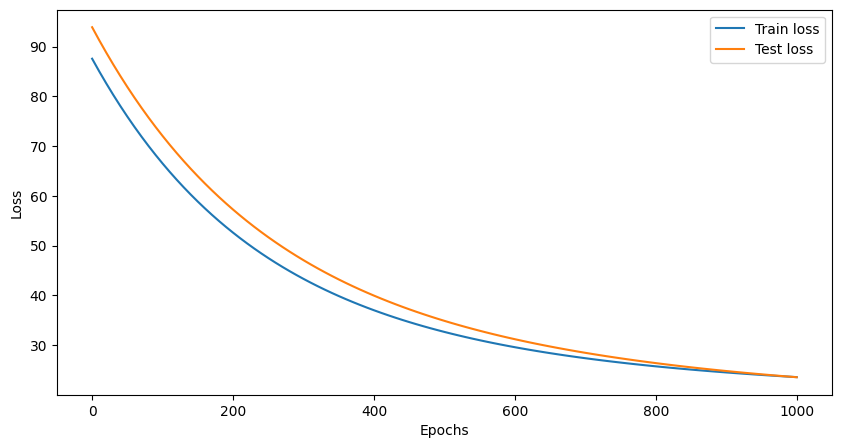

In [24]:
plot_stats(epochs_count1, train_loss1, test_loss1)

Epoch 0: MSE Loss: 94.41 | Test Loss: 97.90
Epoch 10: MSE Loss: 88.36 | Test Loss: 92.03
Epoch 20: MSE Loss: 83.13 | Test Loss: 86.89
Epoch 30: MSE Loss: 78.60 | Test Loss: 82.39
Epoch 40: MSE Loss: 74.66 | Test Loss: 78.44
Epoch 50: MSE Loss: 71.23 | Test Loss: 74.97
Epoch 60: MSE Loss: 68.25 | Test Loss: 71.91
Epoch 70: MSE Loss: 65.64 | Test Loss: 69.22
Epoch 80: MSE Loss: 63.35 | Test Loss: 66.83
Epoch 90: MSE Loss: 61.35 | Test Loss: 64.72
Epoch 100: MSE Loss: 59.58 | Test Loss: 62.85
Epoch 110: MSE Loss: 58.02 | Test Loss: 61.19
Epoch 120: MSE Loss: 56.64 | Test Loss: 59.70
Epoch 130: MSE Loss: 55.41 | Test Loss: 58.38
Epoch 140: MSE Loss: 54.32 | Test Loss: 57.19
Epoch 150: MSE Loss: 53.34 | Test Loss: 56.13
Epoch 160: MSE Loss: 52.46 | Test Loss: 55.18
Epoch 170: MSE Loss: 51.67 | Test Loss: 54.32
Epoch 180: MSE Loss: 50.95 | Test Loss: 53.55
Epoch 190: MSE Loss: 50.30 | Test Loss: 52.85
Epoch 200: MSE Loss: 49.71 | Test Loss: 52.21
Epoch 210: MSE Loss: 49.16 | Test Loss: 51.64

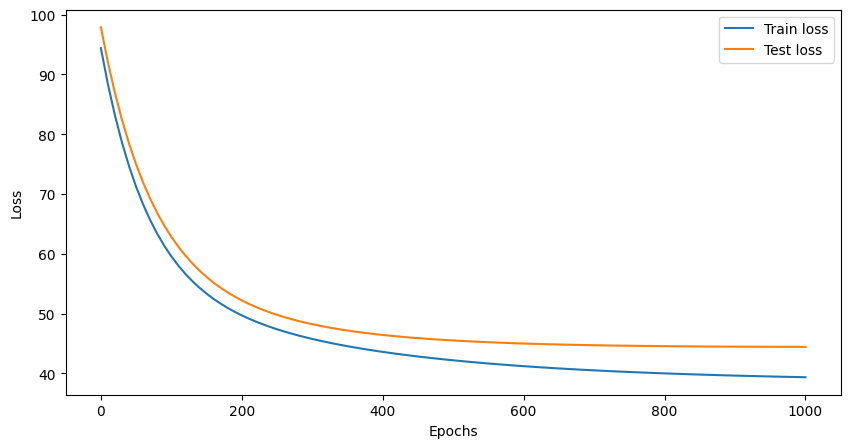

In [25]:
optimizer2 = torch.optim.SGD(X2_model.parameters(), lr=0.0007)
epochs_count2, train_loss2, test_loss2 =trainning(X2_model, 
                                               train_data=X_train2, 
                                               train_labels=y_train, 
                                               test_data=X_test2, 
                                               test_labels=y_test, 
                                               loss_function=loss_function, 
                                               optimizer=optimizer2, 
                                               epochs=1000)
plot_stats(epochs_count2, train_loss2, test_loss2)

Epoch 0: MSE Loss: 59.72 | Test Loss: 64.03
Epoch 10: MSE Loss: 59.20 | Test Loss: 63.45
Epoch 20: MSE Loss: 58.69 | Test Loss: 62.89
Epoch 30: MSE Loss: 58.19 | Test Loss: 62.34
Epoch 40: MSE Loss: 57.71 | Test Loss: 61.81
Epoch 50: MSE Loss: 57.24 | Test Loss: 61.29
Epoch 60: MSE Loss: 56.79 | Test Loss: 60.79
Epoch 70: MSE Loss: 56.35 | Test Loss: 60.30
Epoch 80: MSE Loss: 55.92 | Test Loss: 59.83
Epoch 90: MSE Loss: 55.50 | Test Loss: 59.37
Epoch 100: MSE Loss: 55.10 | Test Loss: 58.92
Epoch 110: MSE Loss: 54.70 | Test Loss: 58.48
Epoch 120: MSE Loss: 54.32 | Test Loss: 58.05
Epoch 130: MSE Loss: 53.94 | Test Loss: 57.64
Epoch 140: MSE Loss: 53.58 | Test Loss: 57.24
Epoch 150: MSE Loss: 53.23 | Test Loss: 56.84
Epoch 160: MSE Loss: 52.88 | Test Loss: 56.46
Epoch 170: MSE Loss: 52.55 | Test Loss: 56.09
Epoch 180: MSE Loss: 52.22 | Test Loss: 55.73
Epoch 190: MSE Loss: 51.91 | Test Loss: 55.37
Epoch 200: MSE Loss: 51.60 | Test Loss: 55.03
Epoch 210: MSE Loss: 51.30 | Test Loss: 54.70

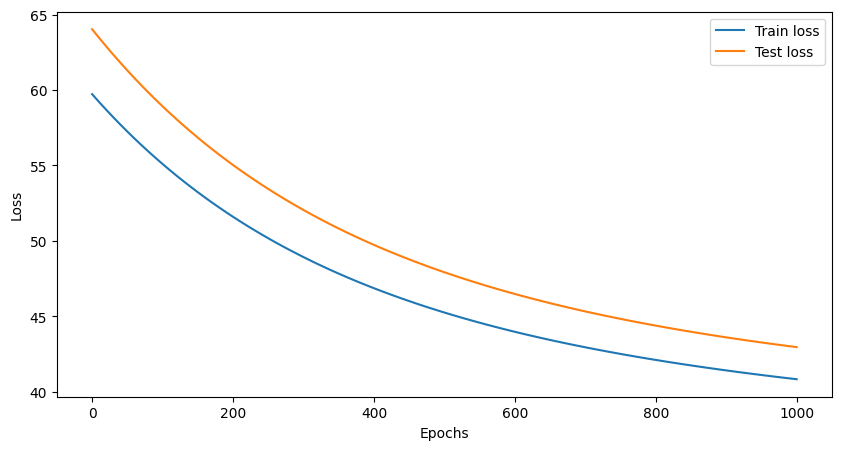

In [26]:
optimizer3 = torch.optim.SGD(X3_model.parameters(), lr=0.0007)
epochs_count3, train_loss3, test_loss3 =trainning(X3_model, 
                                               train_data=X_train3, 
                                               train_labels=y_train, 
                                               test_data=X_test3, 
                                               test_labels=y_test, 
                                               loss_function=loss_function, 
                                               optimizer=optimizer3, 
                                               epochs=1000)
plot_stats(epochs_count3, train_loss3, test_loss3)

Epoch 0: MSE Loss: 57.02 | Test Loss: 60.26
Epoch 10: MSE Loss: 56.44 | Test Loss: 59.61
Epoch 20: MSE Loss: 55.88 | Test Loss: 59.00
Epoch 30: MSE Loss: 55.37 | Test Loss: 58.42
Epoch 40: MSE Loss: 54.88 | Test Loss: 57.87
Epoch 50: MSE Loss: 54.42 | Test Loss: 57.35
Epoch 60: MSE Loss: 53.98 | Test Loss: 56.86
Epoch 70: MSE Loss: 53.57 | Test Loss: 56.40
Epoch 80: MSE Loss: 53.19 | Test Loss: 55.96
Epoch 90: MSE Loss: 52.83 | Test Loss: 55.54
Epoch 100: MSE Loss: 52.48 | Test Loss: 55.15
Epoch 110: MSE Loss: 52.16 | Test Loss: 54.78
Epoch 120: MSE Loss: 51.86 | Test Loss: 54.42
Epoch 130: MSE Loss: 51.57 | Test Loss: 54.09
Epoch 140: MSE Loss: 51.30 | Test Loss: 53.77
Epoch 150: MSE Loss: 51.04 | Test Loss: 53.47
Epoch 160: MSE Loss: 50.80 | Test Loss: 53.19
Epoch 170: MSE Loss: 50.57 | Test Loss: 52.92
Epoch 180: MSE Loss: 50.35 | Test Loss: 52.66
Epoch 190: MSE Loss: 50.15 | Test Loss: 52.42
Epoch 200: MSE Loss: 49.95 | Test Loss: 52.19
Epoch 210: MSE Loss: 49.77 | Test Loss: 51.97

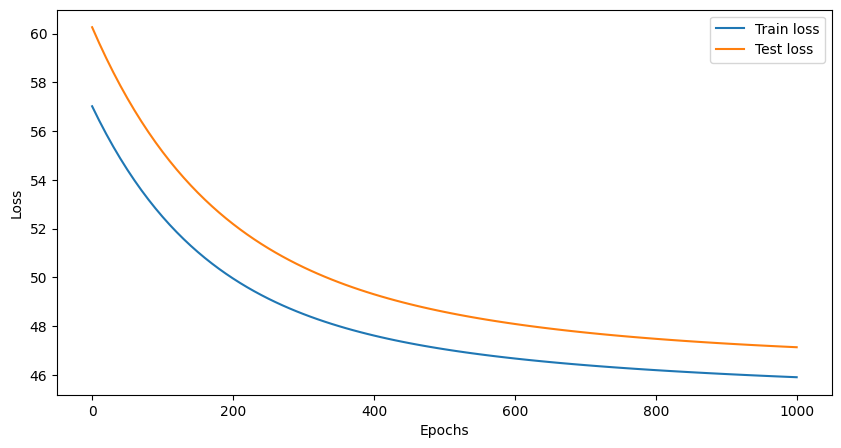

In [27]:
optimizer4 = torch.optim.SGD(X4_model.parameters(), lr=0.0007)
epochs_count4, train_loss4, test_loss4 =trainning(X4_model, 
                                               train_data=X_train4, 
                                               train_labels=y_train, 
                                               test_data=X_test4, 
                                               test_labels=y_test, 
                                               loss_function=loss_function, 
                                               optimizer=optimizer4, 
                                               epochs=1000)
plot_stats(epochs_count4, train_loss4, test_loss4)

Epoch 0: MSE Loss: 69.35 | Test Loss: 74.83
Epoch 10: MSE Loss: 68.80 | Test Loss: 74.28
Epoch 20: MSE Loss: 68.28 | Test Loss: 73.74
Epoch 30: MSE Loss: 67.77 | Test Loss: 73.22
Epoch 40: MSE Loss: 67.27 | Test Loss: 72.72
Epoch 50: MSE Loss: 66.80 | Test Loss: 72.23
Epoch 60: MSE Loss: 66.34 | Test Loss: 71.76
Epoch 70: MSE Loss: 65.89 | Test Loss: 71.31
Epoch 80: MSE Loss: 65.46 | Test Loss: 70.87
Epoch 90: MSE Loss: 65.05 | Test Loss: 70.44
Epoch 100: MSE Loss: 64.64 | Test Loss: 70.03
Epoch 110: MSE Loss: 64.25 | Test Loss: 69.63
Epoch 120: MSE Loss: 63.88 | Test Loss: 69.24
Epoch 130: MSE Loss: 63.51 | Test Loss: 68.87
Epoch 140: MSE Loss: 63.16 | Test Loss: 68.51
Epoch 150: MSE Loss: 62.82 | Test Loss: 68.16
Epoch 160: MSE Loss: 62.49 | Test Loss: 67.82
Epoch 170: MSE Loss: 62.18 | Test Loss: 67.49
Epoch 180: MSE Loss: 61.87 | Test Loss: 67.17
Epoch 190: MSE Loss: 61.57 | Test Loss: 66.87
Epoch 200: MSE Loss: 61.28 | Test Loss: 66.57
Epoch 210: MSE Loss: 61.01 | Test Loss: 66.28

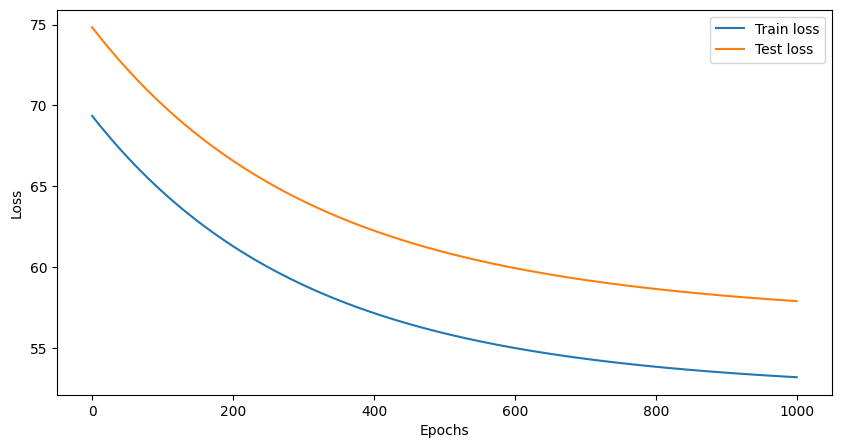

In [28]:
optimizer5 = torch.optim.SGD(X5_model.parameters(), lr=0.0007)
epochs_count5, train_loss5, test_loss5 =trainning(X5_model, 
                                               train_data=X_train5, 
                                               train_labels=y_train, 
                                               test_data=X_test5, 
                                               test_labels=y_test, 
                                               loss_function=loss_function, 
                                               optimizer=optimizer5, 
                                               epochs=1000)
plot_stats(epochs_count5, train_loss5, test_loss5)

In [29]:
from pathlib import Path
import torch

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

models = [X1_model, X2_model, X3_model, X4_model, X5_model]

for i, model in enumerate(models, start=1):
    # Save the model
    model_name = f'model_{i}.pth'
    model_save_path = model_path / model_name

    print(f"Saving model to: {model_save_path}")
    torch.save(model.state_dict(), model_save_path)


Saving model to: models/model_1.pth
Saving model to: models/model_2.pth
Saving model to: models/model_3.pth
Saving model to: models/model_4.pth
Saving model to: models/model_5.pth
